In [2]:
import matplotlib.pyplot as plt
import numpy as np
import poppy
from poppy.poppy_core import PlaneType
import astropy.units as u
import astropy.io.fits as fits

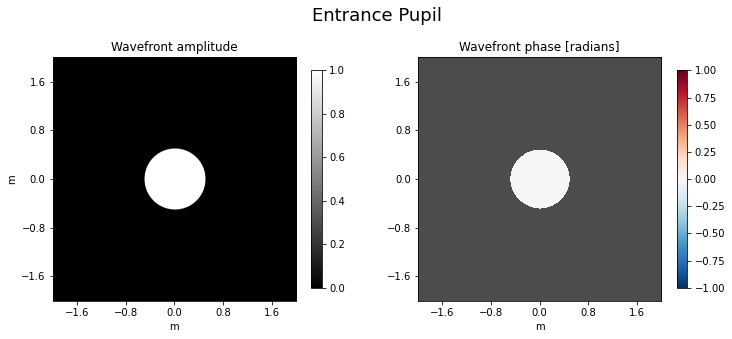

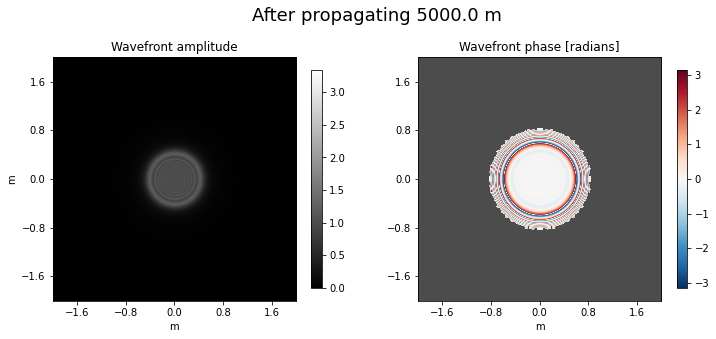

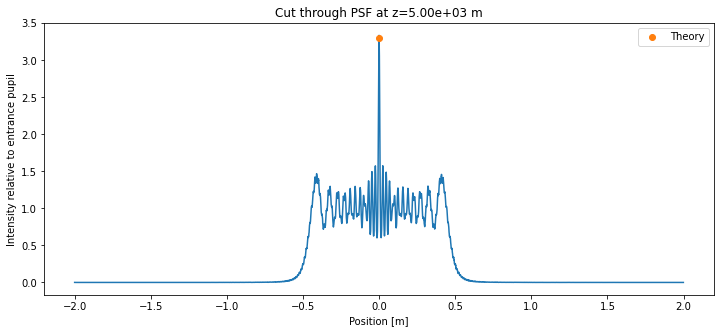

In [3]:
npix = 1024 # ~512 is minimum to accurately recover the central diffraction spike
wf = poppy.FresnelWavefront(0.5*u.m,wavelength=2200e-9,npix=npix,oversample=4)
wf *= poppy.CircularAperture(radius=0.5) 

plt.figure(figsize=(12,5))
wf.display('both',colorbar=True, showpadding=True)
plt.suptitle("Entrance Pupil", fontsize=18)

z = 5e3*u.m
wf.propagate_fresnel(z)

plt.figure(figsize=(12,5))
wf.display('both',colorbar=True)
plt.suptitle("After propagating {}".format(z), fontsize=18)

plt.figure(figsize=(12,5))
y, x = wf.coordinates()
plt.plot(x[wf.intensity.shape[1]//2,:], wf.intensity[wf.intensity.shape[1]//2,:])
plt.title("Cut through PSF at z={:0.2e}".format(z))
plt.xlabel('Position [m]')
plt.ylabel('Intensity relative to entrance pupil')

plt.plot([0], [3.30], 'o', label='Theory')
plt.legend(loc='upper right')